In [1]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob as tb
#import re
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline

In [2]:
consumerKey = 'SV8UUKCsWGbHB0fBG9xEWdDDl'
consumerSecret = 'gu7fZc75qzoZ20Cf1Y4FDSBGiX40H5L5dlMhmVqFecMZzUzBuo'
accessToken = '1074255938-ea90Lx6fUeZ6MW780cHpmmozr4XDmC47VH4cKpM'
accessTokenSecret = 'Npsz59fFPutq2aCbdfO6l0ylYjHZAgZxkojUoWHV8gsIh'


In [3]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
searchTweet = input("Enter name of celebrity or brand ")
NoOfTweets = int(input('Enter number of tweet to search '))


Enter name of celebrity or brand drake
Enter number of tweet to search 100


In [5]:

tweets = tweepy.Cursor(api.search, q=searchTweet).items(NoOfTweets)
data=[]

In [6]:
for tweet in tweets:
    text=tweet.text
    tweet_time = tweet.created_at
    textWords=text
    #cleanedTweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", text).split())
    #cleanedTweet = ' '.join(re.sub()
   # print (cleanedTweet)
    #print(textWords)

    #analysis= tb(cleanedTweet)
    analysis = tb(textWords)
    #print (analysis.sentiment)
    polarity = 'Positive'
    if(analysis.sentiment.polarity < 0):
        polarity = 'Negative'
    if(0<=analysis.sentiment.polarity <=0.2):
        polarity = 'Neutral'
    
    dic={}
    dic['Sentiment']=polarity
    #dic['Tweet']=cleanedTweet
    dic['Tweet'] = textWords
    dic['Tweettime'] = tweet_time
    data.append(dic)
df=pd.DataFrame(data)
df.to_csv('devclan.csv')

In [7]:
train = pd.read_csv('devclan.csv',index_col=0)

In [8]:
train.shape

(100, 3)

In [9]:
train.head(20)

,Sentiment,Tweet,Tweettime
0,Neutral,Drake don't got nothin' on this kid https://t....,2018-07-23 09:26:56
1,Neutral,RT @WORLDWIDENM: #FEFE dethroned Drake on the ...,2018-07-23 09:26:54
2,Neutral,@jumpman_jayy Take Care - Drake\nForest Hills ...,2018-07-23 09:26:54
3,Negative,RT @SimoneAndPumbaa: Her move when Drake says ...,2018-07-23 09:26:53
4,Neutral,😂😂😂😂😂😂😂😂😂😂😂😂 alright drake head ass https://t....,2018-07-23 09:26:52
5,Neutral,RT @vxtakaki: drake ja dizia:\n\nfoi mal ae p...,2018-07-23 09:26:51
6,Positive,RT @WSHHRAP: Rap artists with the most Grammy ...,2018-07-23 09:26:46
7,Neutral,RT @benhatem_walid: Drake fait des dégâts... 😱...,2018-07-23 09:26:43
8,Neutral,RT @MUFFINftPIZZA: SOY DE LA EPOCA DE BIG TIME...,2018-07-23 09:26:43
9,Negative,with the next episode in the Uncharted: Drake'...,2018-07-23 09:26:38


In [10]:
train.describe()

,Sentiment,Tweet,Tweettime
count,100,100,100
unique,3,61,70
top,Neutral,RT @SimoneAndPumbaa: Her move when Drake says ...,2018-07-23 09:25:52
freq,67,8,3


In [11]:
#print(list(train['Tweet']))

In [12]:
positive = train['Sentiment'] == 'Positive'
negative = train['Sentiment'] == 'Negative'
neutral = train['Sentiment'] == 'Neutral'
time = train['Tweettime']
Sentiment = train['Sentiment']

In [13]:
#label = []
#label.append

In [14]:
positive.value_counts()

False    81
True     19
Name: Sentiment, dtype: int64

In [15]:
negative.value_counts()


False    86
True     14
Name: Sentiment, dtype: int64

In [16]:
neutral.value_counts()

True     67
False    33
Name: Sentiment, dtype: int64

In [17]:
#train["Sentiment"][train["Sentiment"] == "Positive"] = 1
#train['Sentiment'][train['Sentiment'] == 'Negative' ] = 2
#train['Sentiment'][train['Sentiment'] == 'Neutral' ] = 0



In [18]:
#plt.xlabel = 'Sentiment'
#plt.ylabel = 'tweettime'
#color_pla = {"Positive":"red", "Negative": "green", "Neutral":"blue"}

#plt.scatter( Sentiment,time, color=[color_pla[i] for i in train['Sentiment']])
#plt.show()

In [19]:
size = train['Sentiment'].value_counts().tolist()
#print(size)
sice = Sentiment.tolist()
labels = list(set(sice))
print(labels)

['Positive', 'Negative', 'Neutral']


In [20]:
#labels = ['Neutral', 'Postive', 'Negative']
colors = ['yellow', 'blue', 'red']
explode = (0.1, 0.1, 0.1)
explode_list = list(explode)
if len(labels) == 2:
    colors = colors[:2]
    explode = explode[:2]
elif len(labels) == 3:
    colors = colors
    explode = explode
elif len(labels) == 1:
    colors = colors[:1]
    explode = explode[:1]

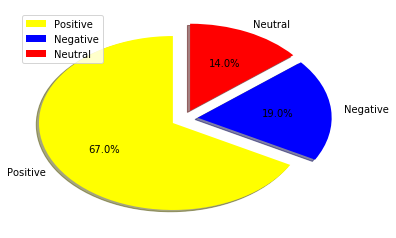

In [21]:
plt.pie(size, colors=colors, labels=labels, shadow=True, startangle= 90, autopct='%1.1f%%', explode = explode)
plt.legend(labels)
plt.show()